# Quickstart
This jupyter notebook gives a good introduction in how to get started with USDA

Firts, make sure that:
- pip install pipenv
- pipenv install
- pipenv shell

Let's get started with some simple example.

In [52]:
# Import standart library
from pathlib import Path
import pandas as pd

# Our USDA python package
# from usda.api.services import FASService, MARSService, NASSService
from src.usda.api.services import FASService, MARSService, NASSService

Definition: 
- ROOT project direction path
- Path save data from API

In [53]:
ROOT_DIR_PATH = Path(__name__).absolute().parent
PATH_TO_SAVE_DATA = ROOT_DIR_PATH / "data"

Setting all configuration about each API services
- FAS (Foreign Agricultural Service)
- MARS (Agricultural Marketing Service)
- NASS (National Agricultural Statistics Service)

In [54]:
# API_KEY taken after registering on each website
SETTINGS = {
    "fas": {
        "api_key": "api_key",
        "url": "https://apps.fas.usda.gov/OpenData/swagger/docs/v1",
    },
    "mars": {
        "api_key": "api_key",
        "url": "https://marsapi.ams.usda.gov/services/v1.2",
    },
    "nass": {
        "api_key": "api_key",
        "url": "http://quickstats.nass.usda.gov/api",
    },
}

Initializing instances of API services

In [55]:
# Init USDA APIs services
nass = NASSService(SETTINGS["nass"]["api_key"])
fas = FASService(SETTINGS["fas"]["api_key"])
mars = MARSService(SETTINGS["mars"]["api_key"])

Now, let's try to send GET HTTP request with passing parameters to the National Agricultural Statistics Service server

In [56]:
# Send GET HTTP request to server and responce status code must be 200
status_code = nass.get(params={"commodity_desc": "CORN", "year__GE": "2018", "state_alpha": "VA"})
print(f"status code: {status_code}")
print(f"url: {nass.url}")

status code: 200
url: http://quickstats.nass.usda.gov/api


Now, let's get and print dataframe with information from API

In [57]:
df_nass = nass.get_dataframe()
print(df_nass.head())

  zip_5 state_ansi state_fips_code statisticcat_desc util_practice_desc  \
0               51              51    AREA HARVESTED              GRAIN   
1               51              51    AREA HARVESTED              GRAIN   
2               51              51    AREA HARVESTED              GRAIN   
3               51              51    AREA HARVESTED              GRAIN   
4               51              51    AREA HARVESTED              GRAIN   

  agg_level_desc prodn_practice_desc commodity_desc  year asd_desc  ...  \
0          STATE           IRRIGATED           CORN  2018           ...   
1          STATE           IRRIGATED           CORN  2018           ...   
2          STATE           IRRIGATED           CORN  2018           ...   
3          STATE           IRRIGATED           CORN  2018           ...   
4          STATE           IRRIGATED           CORN  2018           ...   

  county_code   group_desc week_ending country_code begin_code CV (%)  \
0              FIELD CROP

Draw histogram sum Value CORNs from 2018 to 2022

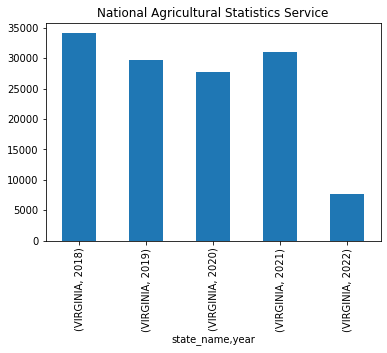

In [58]:
nass.plot(df_nass, x="year", y="Value")

Save dataframe in the Excel file for the next analyzing

In [59]:
path = nass.to_file(PATH_TO_SAVE_DATA, df_nass)
print(f"see: {path}")

see: /home/boss/Dev/usda-package/data/NASSService.csv


Now, let's try to save information in Excel file by year each sheet

In [60]:
# from usda.api.utils.merge_and_savefile
from src.usda.api.utils.merge_and_savefile import merge_and_savefile

Now, let's try to send GET HTTP request with passing parameters to the Foreign Agricultural Service server

In [61]:
dfs_fas_2018to2022 = []
commodityCode = 401 # CORN
from_year = 2019
to_year = 2022

for year in range(from_year, to_year+1):
    status_code = fas.get(endpoint=f"/esr/exports/commodityCode/{commodityCode}/allCountries/marketYear/{year}")
    print(f"status code: {status_code}")
    print(f"url: {fas.url}")

    dfs_fas_2018to2022.append(fas.get_dataframe())

df_fas = pd.concat(dfs_fas_2018to2022, ignore_index=True)
df_fas.head()

status code: 200
url: https://apps.fas.usda.gov/OpenData/api
status code: 200
url: https://apps.fas.usda.gov/OpenData/api
status code: 200
url: https://apps.fas.usda.gov/OpenData/api
status code: 200
url: https://apps.fas.usda.gov/OpenData/api


,commodityCode,countryCode,weeklyExports,accumulatedExports,outstandingSales,grossNewSales,currentMYNetSales,currentMYTotalCommitment,nextMYOutstandingSales,nextMYNetSales,unitId,weekEndingDate
0,401,1220,6154,6154,64903,68771,3999,71057,0,0,1,2018-09-06T00:00:00
1,401,2010,226725,226725,4386392,806227,218441,4613117,71124,0,1,2018-09-06T00:00:00
2,401,2050,21110,21110,402947,40105,934,424057,0,0,1,2018-09-06T00:00:00
3,401,2110,2500,2500,222813,10841,3135,225313,0,0,1,2018-09-06T00:00:00
4,401,2150,0,0,116235,10697,997,116235,0,0,1,2018-09-06T00:00:00


Now, let's try to save information in Excel file by year each sheet

In [62]:
# from usda.api.utils.merge_and_savefile
from src.usda.api.utils.merge_and_savefile import merge_and_savefile

merge_and_savefile(PATH_TO_SAVE_DATA, dfs={"nass": df_nass, "fas": df_fas})

## Prediction using Prophet

Import PROPHET library

In [63]:
from prophet import Prophet

Fitting data from USDA services

In [64]:
df_nass.rename(columns={"load_time":"ds","Value":"y"}, errors="raise", inplace=True)
df_fas.rename(columns={"weekEndingDate": "ds", "currentMYTotalCommitment": "y"}, errors="raise", inplace=True)
nass_m, fas_m = Prophet(), Prophet()
nass_m.fit(df_nass)
fas_m.fit(df_fas)

14:39:29 - cmdstanpy - INFO - Chain [1] start processing
14:39:29 - cmdstanpy - INFO - Chain [1] done processing
14:39:30 - cmdstanpy - INFO - Chain [1] start processing
14:39:31 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
nass_future = nass_m.make_future_dataframe(periods=365)
fas_future = fas_m.make_future_dataframe(periods=365)

In [66]:
nass_forecast = nass_m.predict(nass_future)
fas_forecast = fas_m.predict(fas_future)

## Plotting graph National Agricultural Statistics Service (NASS)

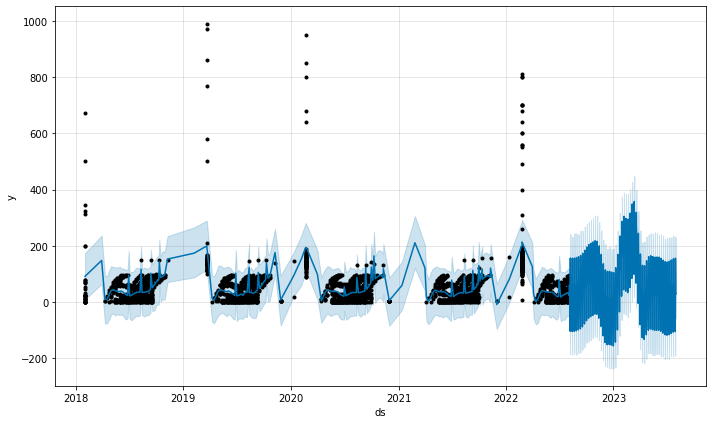

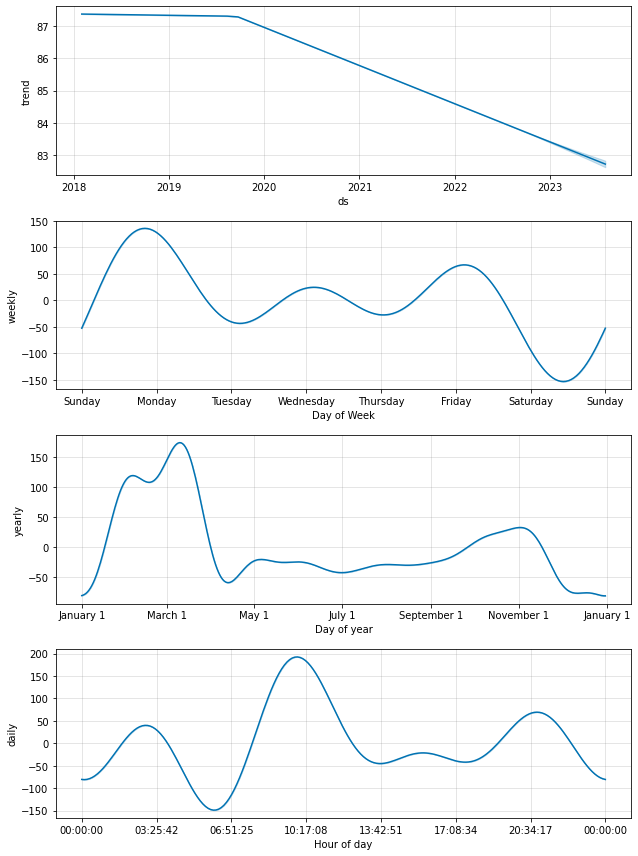

In [67]:
fig1 = nass_m.plot(nass_forecast)
fig2 = nass_m.plot_components(nass_forecast)

## Plotting graph Foreign Agricultural Service (FAS)

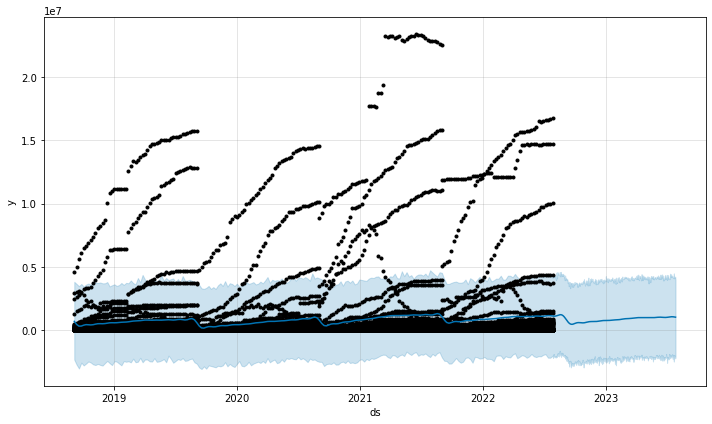

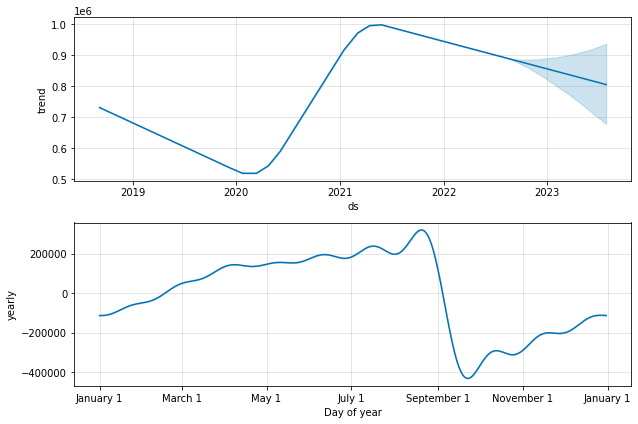

In [68]:
fig1 = fas_m.plot(fas_forecast)
fig2 = fas_m.plot_components(fas_forecast)